# Setup

In [1]:
# import your standard packages
%run ../pkgs.py
%run ../pars.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths

In [2]:
inpath = '../../data/woa_processed.nc'
outfn = '../../data/woa_coastal_processed.nc'

ds_out = xr.Dataset()

# Get Data

In [3]:
ds_WOA = xr.open_dataset('../../data/woa_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                    (lat: 35, lon: 55, month: 12, pres: 57)
Coordinates:
  * month                      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * pres                       (pres) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                        (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                        (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
Data variables:
    temp                       (month, pres, lat, lon) float64 ...
    sal                        (month, pres, lat, lon) float64 ...
    doxy                       (month, pres, lat, lon) float64 ...
    nitrate                    (month, pres, lat, lon) float64 ...
    phosphate                  (month, pres, lat, lon) float64 ...
    temp_40_200                (month, lat, lon) float64 ...
    doxy_40_200                (month, lat, lon) float64 ...
    sal_40_200                 (month, lat, lon) float64 ...
    nitrate_40_200             (month, lat, lon) float64 ...
 

In [4]:
ds_mask = xr.open_dataset('../../data/coastal_mask.nc')
ds_mask

<xarray.Dataset>
Dimensions:         (lat: 138, lat_ro: 138, lat_woa: 35, loc_wod: 314731, loc_wod18: 301299, lon: 226, lon_ro: 216, lon_woa: 55)
Coordinates:
  * lat             (lat) float64 -1.5 -1.25 -1.0 -0.75 ... 32.25 32.5 32.75
  * lon             (lon) float64 48.5 48.75 49.0 49.25 ... 104.2 104.5 104.8
  * lat_ro          (lat_ro) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * lon_ro          (lon_ro) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat_woa         (lat_woa) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
  * lon_woa         (lon_woa) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * loc_wod         (loc_wod) int64 0 1 2 3 4 ... 314727 314728 314729 314730
  * loc_wod18       (loc_wod18) int64 0 1 2 3 4 ... 301295 301296 301297 301298
Data variables:
    maskw           (lat, lon) float64 ...
    maskw_ro        (lat_ro, lon_ro) int64 ...
    maskn           (lat, lon) float64 ...
    maskw_woa       (lat_woa, lon_woa) bool ...
    maskw_ro_w

# Find Coastal Mask Data

# 50-200

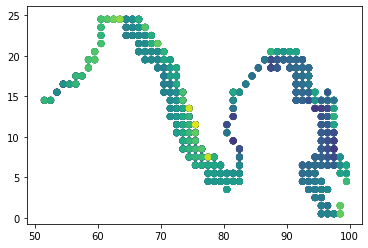

In [5]:
depth = '50_200'
temp = ds_WOA['temp_' + depth]
sal = ds_WOA['sal_' + depth]
doxy = ds_WOA['doxy_' + depth]
nitrate = ds_WOA['nitrate_' + depth]
phosphate = ds_WOA['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################
lat_slice_wAS = slice(bounds_wAS[2],bounds_wAS[3]) 
lon_slice_wAS = slice(bounds_wAS[0],bounds_wAS[1]) 

#subset gridded data
temp_wAS = temp.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
sal_wAS = sal.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
doxy_wAS = doxy.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
nitrate_wAS = nitrate.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
phosphate_wAS = phosphate.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
mask_wAS = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wAS, lon_woa = lon_slice_wAS)).flatten()

xx,yy = np.meshgrid(np.array(temp_wAS.lon),np.array(temp_wAS.lat))
xx_wAS = xx.flatten()
yy_wAS = yy.flatten()

temp_wAS = temp_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
sal_wAS = sal_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
doxy_wAS = doxy_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
nitrate_wAS = nitrate_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
phosphate_wAS = phosphate_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
xx_wAS = xx_wAS[mask_wAS]
yy_wAS = yy_wAS[mask_wAS]

mon_wAS = np.full(temp_wAS.shape,np.nan)
lat_wAS = np.full(temp_wAS.shape,np.nan)
lon_wAS = np.full(temp_wAS.shape,np.nan)
for tt in range(1,13):
    mon_wAS[tt-1,:] = np.ones([1,temp_wAS.shape[1]])*tt
    lat_wAS[tt-1,:] = yy_wAS
    lon_wAS[tt-1,:] = xx_wAS
    
temp_wAS = np.array(temp_wAS).flatten()
sal_wAS = np.array(sal_wAS).flatten()
doxy_wAS = np.array(doxy_wAS).flatten()
nitrate_wAS = np.array(nitrate_wAS).flatten()
phosphate_wAS = np.array(phosphate_wAS).flatten()
mon_wAS = np.array(mon_wAS).flatten()
lat_wAS = np.array(lat_wAS).flatten()
lon_wAS = np.array(lon_wAS).flatten()

#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

lat_slice_eAS = slice(bounds_eAS[2],bounds_eAS[3]) 
lon_slice_eAS = slice(bounds_eAS[0],bounds_eAS[1]) 

#subset gridded data
temp_eAS = temp.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
sal_eAS = sal.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
doxy_eAS = doxy.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
nitrate_eAS = nitrate.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
phosphate_eAS = phosphate.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
mask_eAS = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eAS, 
                                             lon_woa = lon_slice_eAS)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eAS.lon),np.array(temp_eAS.lat))
xx_eAS = xx.flatten()
yy_eAS = yy.flatten()

temp_eAS = temp_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
sal_eAS = sal_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
doxy_eAS = doxy_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
nitrate_eAS = nitrate_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
phosphate_eAS = phosphate_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
xx_eAS = xx_eAS[mask_eAS]
yy_eAS = yy_eAS[mask_eAS]

mon_eAS = np.full(temp_eAS.shape,np.nan)
lat_eAS = np.full(temp_eAS.shape,np.nan)
lon_eAS = np.full(temp_eAS.shape,np.nan)
for tt in range(1,13):
    mon_eAS[tt-1,:] = np.ones([1,temp_eAS.shape[1]])*tt
    lat_eAS[tt-1,:] = yy_eAS
    lon_eAS[tt-1,:] = xx_eAS
    
temp_eAS = np.array(temp_eAS).flatten()
sal_eAS = np.array(sal_eAS).flatten()
doxy_eAS = np.array(doxy_eAS).flatten()
nitrate_eAS = np.array(nitrate_eAS).flatten()
phosphate_eAS = np.array(phosphate_eAS).flatten()
mon_eAS = np.array(mon_eAS).flatten()
lat_eAS = np.array(lat_eAS).flatten()
lon_eAS = np.array(lon_eAS).flatten()

# SL area -------------------------------------------------------#
lat_slice_eAS_SL = slice(bounds_eAS_SL[2],bounds_eAS_SL[3]) 
lon_slice_eAS_SL = slice(bounds_eAS_SL[0],bounds_eAS_SL[1]) 

#subset gridded data
temp_eAS_SL = temp.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
sal_eAS_SL = sal.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
doxy_eAS_SL = doxy.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
nitrate_eAS_SL = nitrate.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
phosphate_eAS_SL = phosphate.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
mask_eAS_SL = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eAS_SL, 
                                             lon_woa = lon_slice_eAS_SL)).flatten()
# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eAS_SL.lon),np.array(temp_eAS_SL.lat))
xx_eAS_SL = xx.flatten()
yy_eAS_SL = yy.flatten()

temp_eAS_SL = temp_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
sal_eAS_SL = sal_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
doxy_eAS_SL = doxy_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
nitrate_eAS_SL = nitrate_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
phosphate_eAS_SL = phosphate_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
xx_eAS_SL = xx_eAS_SL[mask_eAS_SL]
yy_eAS_SL = yy_eAS_SL[mask_eAS_SL]

mon_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
lat_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
lon_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
for tt in range(1,13):
    mon_eAS_SL[tt-1,:] = np.ones([1,temp_eAS_SL.shape[1]])*tt
    lat_eAS_SL[tt-1,:] = yy_eAS_SL
    lon_eAS_SL[tt-1,:] = xx_eAS_SL
    
temp_eAS_SL = np.array(temp_eAS_SL).flatten()
sal_eAS_SL = np.array(sal_eAS_SL).flatten()
doxy_eAS_SL = np.array(doxy_eAS_SL).flatten()
nitrate_eAS_SL = np.array(nitrate_eAS_SL).flatten()
phosphate_eAS_SL = np.array(phosphate_eAS_SL).flatten()
mon_eAS_SL = np.array(mon_eAS_SL).flatten()
lat_eAS_SL = np.array(lat_eAS_SL).flatten()
lon_eAS_SL = np.array(lon_eAS_SL).flatten()

# combine
temp_eAS = np.concatenate((temp_eAS,temp_eAS_SL),0)
sal_eAS = np.concatenate((sal_eAS,sal_eAS_SL),0)
doxy_eAS = np.concatenate((doxy_eAS,doxy_eAS_SL),0)
nitrate_eAS = np.concatenate((nitrate_eAS, nitrate_eAS_SL),0)
phosphate_eAS = np.concatenate((phosphate_eAS,phosphate_eAS_SL),0)
mon_eAS = np.concatenate((mon_eAS,mon_eAS_SL),0)
lat_eAS = np.concatenate((lat_eAS,lat_eAS_SL),0)
lon_eAS = np.concatenate((lon_eAS,lon_eAS_SL),0)

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = temp.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sal_wBoB = sal.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = doxy.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
nitrate_wBoB = nitrate.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
phosphate_wBoB = phosphate.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
mask_wBoB = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wBoB, lon_woa = lon_slice_wBoB)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sal_wBoB = sal_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
nitrate_wBoB = nitrate_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
phosphate_wBoB = phosphate_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
lat_wBoB = np.full(temp_wBoB.shape,np.nan)
lon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt
    lat_wBoB[tt-1,:] = yy_wBoB
    lon_wBoB[tt-1,:] = xx_wBoB
    
temp_wBoB = np.array(temp_wBoB).flatten()
sal_wBoB = np.array(sal_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
nitrate_wBoB = np.array(nitrate_wBoB).flatten()
phosphate_wBoB = np.array(phosphate_wBoB).flatten()
mon_wBoB = np.array(mon_wBoB).flatten()
lat_wBoB = np.array(lat_wBoB).flatten()
lon_wBoB = np.array(lon_wBoB).flatten()

# SL area --------------------------------------------------#
lat_slice_wBoB_SL = slice(bounds_wBoB_SL[2],bounds_wBoB_SL[3])
lon_slice_wBoB_SL = slice(bounds_wBoB_SL[0],bounds_wBoB_SL[1])

#subset gridded data
temp_wBoB_SL = temp.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
sal_wBoB_SL = sal.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
doxy_wBoB_SL = doxy.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
nitrate_wBoB_SL = nitrate.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
phosphate_wBoB_SL = phosphate.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
mask_wBoB_SL = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wBoB_SL, 
                                              lon_woa = lon_slice_wBoB_SL)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB_SL.lon),np.array(temp_wBoB_SL.lat))
xx_wBoB_SL = xx.flatten()
yy_wBoB_SL = yy.flatten()

temp_wBoB_SL = temp_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
sal_wBoB_SL = sal_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
doxy_wBoB_SL = doxy_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
nitrate_wBoB_SL = nitrate_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
phosphate_wBoB_SL = phosphate_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
xx_wBoB_SL = xx_wBoB_SL[mask_wBoB_SL]
yy_wBoB_SL = yy_wBoB_SL[mask_wBoB_SL]

mon_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
lat_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
lon_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
for tt in range(1,13):
    mon_wBoB_SL[tt-1,:] = np.ones([1,temp_wBoB_SL.shape[1]])*tt
    lat_wBoB_SL[tt-1,:] = yy_wBoB_SL
    lon_wBoB_SL[tt-1,:] = xx_wBoB_SL
    
temp_wBoB_SL = np.array(temp_wBoB_SL).flatten()
sal_wBoB_SL = np.array(sal_wBoB_SL).flatten()
doxy_wBoB_SL = np.array(doxy_wBoB_SL).flatten()
nitrate_wBoB_SL = np.array(nitrate_wBoB_SL).flatten()
phosphate_wBoB_SL = np.array(phosphate_wBoB_SL).flatten()
mon_wBoB_SL = np.array(mon_wBoB_SL).flatten()
lat_wBoB_SL = np.array(lat_wBoB_SL).flatten()
lon_wBoB_SL = np.array(lon_wBoB_SL).flatten()

# combine
temp_wBoB = np.concatenate((temp_wBoB,temp_wBoB_SL),0)
sal_wBoB = np.concatenate((sal_wBoB,sal_wBoB_SL),0)
doxy_wBoB = np.concatenate((doxy_wBoB,doxy_wBoB_SL),0)
nitrate_wBoB = np.concatenate((nitrate_wBoB, nitrate_wBoB_SL),0)
phosphate_wBoB = np.concatenate((phosphate_wBoB,phosphate_wBoB_SL),0)
mon_wBoB = np.concatenate((mon_wBoB,mon_wBoB_SL),0)
lat_wBoB = np.concatenate((lat_wBoB,lat_wBoB_SL),0)
lon_wBoB = np.concatenate((lon_wBoB,lon_wBoB_SL),0)

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

lat_slice_eBoB = slice(bounds_eBoB[2],bounds_eBoB[3])
lon_slice_eBoB = slice(bounds_eBoB[0],bounds_eBoB[1])

#subset gridded data
temp_eBoB = temp.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
sal_eBoB = sal.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
doxy_eBoB = doxy.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
nitrate_eBoB = nitrate.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
phosphate_eBoB = phosphate.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
mask_eBoB = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eBoB, lon_woa = lon_slice_eBoB)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eBoB.lon),np.array(temp_eBoB.lat))
xx_eBoB = xx.flatten()
yy_eBoB = yy.flatten()

temp_eBoB = temp_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
sal_eBoB = sal_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
doxy_eBoB = doxy_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
nitrate_eBoB = nitrate_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
phosphate_eBoB = phosphate_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
xx_eBoB = xx_eBoB[mask_eBoB]
yy_eBoB = yy_eBoB[mask_eBoB]

mon_eBoB = np.full(temp_eBoB.shape,np.nan)
lat_eBoB = np.full(temp_eBoB.shape,np.nan)
lon_eBoB = np.full(temp_eBoB.shape,np.nan)
for tt in range(1,13):
    mon_eBoB[tt-1,:] = np.ones([1,temp_eBoB.shape[1]])*tt
    lat_eBoB[tt-1,:] = yy_eBoB
    lon_eBoB[tt-1,:] = xx_eBoB
        
temp_eBoB = np.array(temp_eBoB).flatten()
sal_eBoB = np.array(sal_eBoB).flatten()
doxy_eBoB = np.array(doxy_eBoB).flatten()
nitrate_eBoB = np.array(nitrate_eBoB).flatten()
phosphate_eBoB = np.array(phosphate_eBoB).flatten()
mon_eBoB = np.array(mon_eBoB).flatten()
lat_eBoB = np.array(lat_eBoB).flatten()
lon_eBoB = np.array(lon_eBoB).flatten()

#############################################################
#---------------------- Solubility -------------------------#
#############################################################
O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################

ds_out['lat_wAS'] = xr.DataArray(lat_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['lon_wAS'] = xr.DataArray(lon_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['mon_wAS'] = xr.DataArray(mon_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['lat_eAS'] = xr.DataArray(lat_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['lon_eAS'] = xr.DataArray(lon_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['mon_eAS'] = xr.DataArray(mon_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['lat_wBoB'] = xr.DataArray(lat_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['lon_wBoB'] = xr.DataArray(lon_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['mon_wBoB'] = xr.DataArray(mon_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['lat_eBoB'] = xr.DataArray(lat_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['lon_eBoB'] = xr.DataArray(lon_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['mon_eBoB'] = xr.DataArray(mon_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])


# Western Arabian Sea
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['month_wAS'],coords =[mon_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['month_eAS'],coords =[mon_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['sal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])

plt.scatter(lon_eBoB,lat_eBoB,c = temp_eBoB)
plt.scatter(lon_wBoB,lat_wBoB,c = temp_wBoB)
plt.scatter(lon_eAS,lat_eAS,c = temp_eAS)
plt.scatter(lon_wAS,lat_wAS,c = temp_wAS)



## 40-200

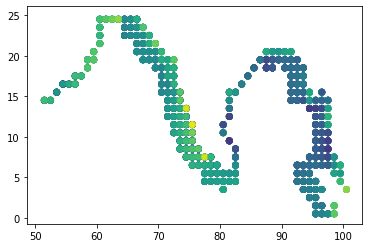

In [6]:
depth = '40_200'
temp = ds_WOA['temp_' + depth]
sal = ds_WOA['sal_' + depth]
doxy = ds_WOA['doxy_' + depth]
nitrate = ds_WOA['nitrate_' + depth]
phosphate = ds_WOA['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################
lat_slice_wAS = slice(bounds_wAS[2],bounds_wAS[3]) 
lon_slice_wAS = slice(bounds_wAS[0],bounds_wAS[1]) 

#subset gridded data
temp_wAS = temp.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
sal_wAS = sal.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
doxy_wAS = doxy.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
nitrate_wAS = nitrate.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
phosphate_wAS = phosphate.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
mask_wAS = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wAS, lon_woa = lon_slice_wAS)).flatten()

xx,yy = np.meshgrid(np.array(temp_wAS.lon),np.array(temp_wAS.lat))
xx_wAS = xx.flatten()
yy_wAS = yy.flatten()

temp_wAS = temp_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
sal_wAS = sal_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
doxy_wAS = doxy_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
nitrate_wAS = nitrate_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
phosphate_wAS = phosphate_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
xx_wAS = xx_wAS[mask_wAS]
yy_wAS = yy_wAS[mask_wAS]

mon_wAS = np.full(temp_wAS.shape,np.nan)
lat_wAS = np.full(temp_wAS.shape,np.nan)
lon_wAS = np.full(temp_wAS.shape,np.nan)
for tt in range(1,13):
    mon_wAS[tt-1,:] = np.ones([1,temp_wAS.shape[1]])*tt
    lat_wAS[tt-1,:] = yy_wAS
    lon_wAS[tt-1,:] = xx_wAS
    
temp_wAS = np.array(temp_wAS).flatten()
sal_wAS = np.array(sal_wAS).flatten()
doxy_wAS = np.array(doxy_wAS).flatten()
nitrate_wAS = np.array(nitrate_wAS).flatten()
phosphate_wAS = np.array(phosphate_wAS).flatten()
mon_wAS = np.array(mon_wAS).flatten()
lat_wAS = np.array(lat_wAS).flatten()
lon_wAS = np.array(lon_wAS).flatten()

#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

lat_slice_eAS = slice(bounds_eAS[2],bounds_eAS[3]) 
lon_slice_eAS = slice(bounds_eAS[0],bounds_eAS[1]) 

#subset gridded data
temp_eAS = temp.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
sal_eAS = sal.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
doxy_eAS = doxy.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
nitrate_eAS = nitrate.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
phosphate_eAS = phosphate.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
mask_eAS = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eAS, 
                                             lon_woa = lon_slice_eAS)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eAS.lon),np.array(temp_eAS.lat))
xx_eAS = xx.flatten()
yy_eAS = yy.flatten()

temp_eAS = temp_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
sal_eAS = sal_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
doxy_eAS = doxy_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
nitrate_eAS = nitrate_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
phosphate_eAS = phosphate_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
xx_eAS = xx_eAS[mask_eAS]
yy_eAS = yy_eAS[mask_eAS]

mon_eAS = np.full(temp_eAS.shape,np.nan)
lat_eAS = np.full(temp_eAS.shape,np.nan)
lon_eAS = np.full(temp_eAS.shape,np.nan)
for tt in range(1,13):
    mon_eAS[tt-1,:] = np.ones([1,temp_eAS.shape[1]])*tt
    lat_eAS[tt-1,:] = yy_eAS
    lon_eAS[tt-1,:] = xx_eAS
    
temp_eAS = np.array(temp_eAS).flatten()
sal_eAS = np.array(sal_eAS).flatten()
doxy_eAS = np.array(doxy_eAS).flatten()
nitrate_eAS = np.array(nitrate_eAS).flatten()
phosphate_eAS = np.array(phosphate_eAS).flatten()
mon_eAS = np.array(mon_eAS).flatten()
lat_eAS = np.array(lat_eAS).flatten()
lon_eAS = np.array(lon_eAS).flatten()

# SL area -------------------------------------------------------#
lat_slice_eAS_SL = slice(bounds_eAS_SL[2],bounds_eAS_SL[3]) 
lon_slice_eAS_SL = slice(bounds_eAS_SL[0],bounds_eAS_SL[1]) 

#subset gridded data
temp_eAS_SL = temp.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
sal_eAS_SL = sal.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
doxy_eAS_SL = doxy.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
nitrate_eAS_SL = nitrate.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
phosphate_eAS_SL = phosphate.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
mask_eAS_SL = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eAS_SL, 
                                             lon_woa = lon_slice_eAS_SL)).flatten()
# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eAS_SL.lon),np.array(temp_eAS_SL.lat))
xx_eAS_SL = xx.flatten()
yy_eAS_SL = yy.flatten()

temp_eAS_SL = temp_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
sal_eAS_SL = sal_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
doxy_eAS_SL = doxy_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
nitrate_eAS_SL = nitrate_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
phosphate_eAS_SL = phosphate_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
xx_eAS_SL = xx_eAS_SL[mask_eAS_SL]
yy_eAS_SL = yy_eAS_SL[mask_eAS_SL]

mon_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
lat_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
lon_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
for tt in range(1,13):
    mon_eAS_SL[tt-1,:] = np.ones([1,temp_eAS_SL.shape[1]])*tt
    lat_eAS_SL[tt-1,:] = yy_eAS_SL
    lon_eAS_SL[tt-1,:] = xx_eAS_SL
    
temp_eAS_SL = np.array(temp_eAS_SL).flatten()
sal_eAS_SL = np.array(sal_eAS_SL).flatten()
doxy_eAS_SL = np.array(doxy_eAS_SL).flatten()
nitrate_eAS_SL = np.array(nitrate_eAS_SL).flatten()
phosphate_eAS_SL = np.array(phosphate_eAS_SL).flatten()
mon_eAS_SL = np.array(mon_eAS_SL).flatten()
lat_eAS_SL = np.array(lat_eAS_SL).flatten()
lon_eAS_SL = np.array(lon_eAS_SL).flatten()

# combine
temp_eAS = np.concatenate((temp_eAS,temp_eAS_SL),0)
sal_eAS = np.concatenate((sal_eAS,sal_eAS_SL),0)
doxy_eAS = np.concatenate((doxy_eAS,doxy_eAS_SL),0)
nitrate_eAS = np.concatenate((nitrate_eAS, nitrate_eAS_SL),0)
phosphate_eAS = np.concatenate((phosphate_eAS,phosphate_eAS_SL),0)
mon_eAS = np.concatenate((mon_eAS,mon_eAS_SL),0)
lat_eAS = np.concatenate((lat_eAS,lat_eAS_SL),0)
lon_eAS = np.concatenate((lon_eAS,lon_eAS_SL),0)

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = temp.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sal_wBoB = sal.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = doxy.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
nitrate_wBoB = nitrate.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
phosphate_wBoB = phosphate.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
mask_wBoB = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wBoB, lon_woa = lon_slice_wBoB)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sal_wBoB = sal_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
nitrate_wBoB = nitrate_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
phosphate_wBoB = phosphate_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
lat_wBoB = np.full(temp_wBoB.shape,np.nan)
lon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt
    lat_wBoB[tt-1,:] = yy_wBoB
    lon_wBoB[tt-1,:] = xx_wBoB
    
temp_wBoB = np.array(temp_wBoB).flatten()
sal_wBoB = np.array(sal_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
nitrate_wBoB = np.array(nitrate_wBoB).flatten()
phosphate_wBoB = np.array(phosphate_wBoB).flatten()
mon_wBoB = np.array(mon_wBoB).flatten()
lat_wBoB = np.array(lat_wBoB).flatten()
lon_wBoB = np.array(lon_wBoB).flatten()

# SL area --------------------------------------------------#
lat_slice_wBoB_SL = slice(bounds_wBoB_SL[2],bounds_wBoB_SL[3])
lon_slice_wBoB_SL = slice(bounds_wBoB_SL[0],bounds_wBoB_SL[1])

#subset gridded data
temp_wBoB_SL = temp.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
sal_wBoB_SL = sal.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
doxy_wBoB_SL = doxy.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
nitrate_wBoB_SL = nitrate.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
phosphate_wBoB_SL = phosphate.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
mask_wBoB_SL = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wBoB_SL, 
                                              lon_woa = lon_slice_wBoB_SL)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB_SL.lon),np.array(temp_wBoB_SL.lat))
xx_wBoB_SL = xx.flatten()
yy_wBoB_SL = yy.flatten()

temp_wBoB_SL = temp_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
sal_wBoB_SL = sal_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
doxy_wBoB_SL = doxy_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
nitrate_wBoB_SL = nitrate_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
phosphate_wBoB_SL = phosphate_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
xx_wBoB_SL = xx_wBoB_SL[mask_wBoB_SL]
yy_wBoB_SL = yy_wBoB_SL[mask_wBoB_SL]

mon_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
lat_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
lon_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
for tt in range(1,13):
    mon_wBoB_SL[tt-1,:] = np.ones([1,temp_wBoB_SL.shape[1]])*tt
    lat_wBoB_SL[tt-1,:] = yy_wBoB_SL
    lon_wBoB_SL[tt-1,:] = xx_wBoB_SL
    
temp_wBoB_SL = np.array(temp_wBoB_SL).flatten()
sal_wBoB_SL = np.array(sal_wBoB_SL).flatten()
doxy_wBoB_SL = np.array(doxy_wBoB_SL).flatten()
nitrate_wBoB_SL = np.array(nitrate_wBoB_SL).flatten()
phosphate_wBoB_SL = np.array(phosphate_wBoB_SL).flatten()
mon_wBoB_SL = np.array(mon_wBoB_SL).flatten()
lat_wBoB_SL = np.array(lat_wBoB_SL).flatten()
lon_wBoB_SL = np.array(lon_wBoB_SL).flatten()

# combine
temp_wBoB = np.concatenate((temp_wBoB,temp_wBoB_SL),0)
sal_wBoB = np.concatenate((sal_wBoB,sal_wBoB_SL),0)
doxy_wBoB = np.concatenate((doxy_wBoB,doxy_wBoB_SL),0)
nitrate_wBoB = np.concatenate((nitrate_wBoB, nitrate_wBoB_SL),0)
phosphate_wBoB = np.concatenate((phosphate_wBoB,phosphate_wBoB_SL),0)
mon_wBoB = np.concatenate((mon_wBoB,mon_wBoB_SL),0)
lat_wBoB = np.concatenate((lat_wBoB,lat_wBoB_SL),0)
lon_wBoB = np.concatenate((lon_wBoB,lon_wBoB_SL),0)

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

lat_slice_eBoB = slice(bounds_eBoB[2],bounds_eBoB[3])
lon_slice_eBoB = slice(bounds_eBoB[0],bounds_eBoB[1])

#subset gridded data
temp_eBoB = temp.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
sal_eBoB = sal.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
doxy_eBoB = doxy.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
nitrate_eBoB = nitrate.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
phosphate_eBoB = phosphate.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
mask_eBoB = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eBoB, lon_woa = lon_slice_eBoB)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eBoB.lon),np.array(temp_eBoB.lat))
xx_eBoB = xx.flatten()
yy_eBoB = yy.flatten()

temp_eBoB = temp_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
sal_eBoB = sal_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
doxy_eBoB = doxy_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
nitrate_eBoB = nitrate_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
phosphate_eBoB = phosphate_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
xx_eBoB = xx_eBoB[mask_eBoB]
yy_eBoB = yy_eBoB[mask_eBoB]

mon_eBoB = np.full(temp_eBoB.shape,np.nan)
lat_eBoB = np.full(temp_eBoB.shape,np.nan)
lon_eBoB = np.full(temp_eBoB.shape,np.nan)
for tt in range(1,13):
    mon_eBoB[tt-1,:] = np.ones([1,temp_eBoB.shape[1]])*tt
    lat_eBoB[tt-1,:] = yy_eBoB
    lon_eBoB[tt-1,:] = xx_eBoB
        
temp_eBoB = np.array(temp_eBoB).flatten()
sal_eBoB = np.array(sal_eBoB).flatten()
doxy_eBoB = np.array(doxy_eBoB).flatten()
nitrate_eBoB = np.array(nitrate_eBoB).flatten()
phosphate_eBoB = np.array(phosphate_eBoB).flatten()
mon_eBoB = np.array(mon_eBoB).flatten()
lat_eBoB = np.array(lat_eBoB).flatten()
lon_eBoB = np.array(lon_eBoB).flatten()

#############################################################
#---------------------- Solubility -------------------------#
#############################################################
O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################

ds_out['lat_wAS'] = xr.DataArray(lat_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['lon_wAS'] = xr.DataArray(lon_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['mon_wAS'] = xr.DataArray(mon_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['lat_eAS'] = xr.DataArray(lat_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['lon_eAS'] = xr.DataArray(lon_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['mon_eAS'] = xr.DataArray(mon_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['lat_wBoB'] = xr.DataArray(lat_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['lon_wBoB'] = xr.DataArray(lon_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['mon_wBoB'] = xr.DataArray(mon_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['lat_eBoB'] = xr.DataArray(lat_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['lon_eBoB'] = xr.DataArray(lon_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['mon_eBoB'] = xr.DataArray(mon_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])


# Western Arabian Sea
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['month_wAS'],coords =[mon_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['month_eAS'],coords =[mon_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['sal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])

plt.scatter(lon_eBoB,lat_eBoB,c = temp_eBoB)
plt.scatter(lon_wBoB,lat_wBoB,c = temp_wBoB)
plt.scatter(lon_eAS,lat_eAS,c = temp_eAS)
plt.scatter(lon_wAS,lat_wAS,c = temp_wAS)




## 50-225

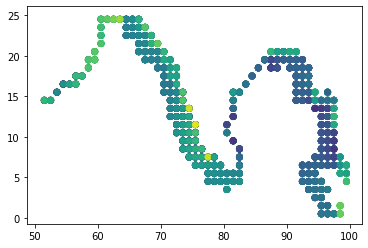

In [7]:
depth = '50_225'
temp = ds_WOA['temp_' + depth]
sal = ds_WOA['sal_' + depth]
doxy = ds_WOA['doxy_' + depth]
nitrate = ds_WOA['nitrate_' + depth]
phosphate = ds_WOA['phosphate_' + depth]

#############################################################
#----------------- Western Arabian Sea ---------------------#
#############################################################
lat_slice_wAS = slice(bounds_wAS[2],bounds_wAS[3]) 
lon_slice_wAS = slice(bounds_wAS[0],bounds_wAS[1]) 

#subset gridded data
temp_wAS = temp.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
sal_wAS = sal.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
doxy_wAS = doxy.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
nitrate_wAS = nitrate.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
phosphate_wAS = phosphate.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
mask_wAS = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wAS, lon_woa = lon_slice_wAS)).flatten()

xx,yy = np.meshgrid(np.array(temp_wAS.lon),np.array(temp_wAS.lat))
xx_wAS = xx.flatten()
yy_wAS = yy.flatten()

temp_wAS = temp_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
sal_wAS = sal_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
doxy_wAS = doxy_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
nitrate_wAS = nitrate_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
phosphate_wAS = phosphate_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
xx_wAS = xx_wAS[mask_wAS]
yy_wAS = yy_wAS[mask_wAS]

mon_wAS = np.full(temp_wAS.shape,np.nan)
lat_wAS = np.full(temp_wAS.shape,np.nan)
lon_wAS = np.full(temp_wAS.shape,np.nan)
for tt in range(1,13):
    mon_wAS[tt-1,:] = np.ones([1,temp_wAS.shape[1]])*tt
    lat_wAS[tt-1,:] = yy_wAS
    lon_wAS[tt-1,:] = xx_wAS
    
temp_wAS = np.array(temp_wAS).flatten()
sal_wAS = np.array(sal_wAS).flatten()
doxy_wAS = np.array(doxy_wAS).flatten()
nitrate_wAS = np.array(nitrate_wAS).flatten()
phosphate_wAS = np.array(phosphate_wAS).flatten()
mon_wAS = np.array(mon_wAS).flatten()
lat_wAS = np.array(lat_wAS).flatten()
lon_wAS = np.array(lon_wAS).flatten()

#############################################################
#----------------- Eastern Arabian Sea ---------------------#
#############################################################

lat_slice_eAS = slice(bounds_eAS[2],bounds_eAS[3]) 
lon_slice_eAS = slice(bounds_eAS[0],bounds_eAS[1]) 

#subset gridded data
temp_eAS = temp.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
sal_eAS = sal.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
doxy_eAS = doxy.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
nitrate_eAS = nitrate.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
phosphate_eAS = phosphate.sel(lat = lat_slice_eAS, lon = lon_slice_eAS)
mask_eAS = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eAS, 
                                             lon_woa = lon_slice_eAS)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eAS.lon),np.array(temp_eAS.lat))
xx_eAS = xx.flatten()
yy_eAS = yy.flatten()

temp_eAS = temp_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
sal_eAS = sal_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
doxy_eAS = doxy_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
nitrate_eAS = nitrate_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
phosphate_eAS = phosphate_eAS.stack(allpoints=['lat','lon'])[:,mask_eAS]
xx_eAS = xx_eAS[mask_eAS]
yy_eAS = yy_eAS[mask_eAS]

mon_eAS = np.full(temp_eAS.shape,np.nan)
lat_eAS = np.full(temp_eAS.shape,np.nan)
lon_eAS = np.full(temp_eAS.shape,np.nan)
for tt in range(1,13):
    mon_eAS[tt-1,:] = np.ones([1,temp_eAS.shape[1]])*tt
    lat_eAS[tt-1,:] = yy_eAS
    lon_eAS[tt-1,:] = xx_eAS
    
temp_eAS = np.array(temp_eAS).flatten()
sal_eAS = np.array(sal_eAS).flatten()
doxy_eAS = np.array(doxy_eAS).flatten()
nitrate_eAS = np.array(nitrate_eAS).flatten()
phosphate_eAS = np.array(phosphate_eAS).flatten()
mon_eAS = np.array(mon_eAS).flatten()
lat_eAS = np.array(lat_eAS).flatten()
lon_eAS = np.array(lon_eAS).flatten()

# SL area -------------------------------------------------------#
lat_slice_eAS_SL = slice(bounds_eAS_SL[2],bounds_eAS_SL[3]) 
lon_slice_eAS_SL = slice(bounds_eAS_SL[0],bounds_eAS_SL[1]) 

#subset gridded data
temp_eAS_SL = temp.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
sal_eAS_SL = sal.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
doxy_eAS_SL = doxy.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
nitrate_eAS_SL = nitrate.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
phosphate_eAS_SL = phosphate.sel(lat = lat_slice_eAS_SL, lon = lon_slice_eAS_SL)
mask_eAS_SL = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eAS_SL, 
                                             lon_woa = lon_slice_eAS_SL)).flatten()
# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eAS_SL.lon),np.array(temp_eAS_SL.lat))
xx_eAS_SL = xx.flatten()
yy_eAS_SL = yy.flatten()

temp_eAS_SL = temp_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
sal_eAS_SL = sal_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
doxy_eAS_SL = doxy_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
nitrate_eAS_SL = nitrate_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
phosphate_eAS_SL = phosphate_eAS_SL.stack(allpoints=['lat','lon'])[:,mask_eAS_SL]
xx_eAS_SL = xx_eAS_SL[mask_eAS_SL]
yy_eAS_SL = yy_eAS_SL[mask_eAS_SL]

mon_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
lat_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
lon_eAS_SL = np.full(temp_eAS_SL.shape,np.nan)
for tt in range(1,13):
    mon_eAS_SL[tt-1,:] = np.ones([1,temp_eAS_SL.shape[1]])*tt
    lat_eAS_SL[tt-1,:] = yy_eAS_SL
    lon_eAS_SL[tt-1,:] = xx_eAS_SL
    
temp_eAS_SL = np.array(temp_eAS_SL).flatten()
sal_eAS_SL = np.array(sal_eAS_SL).flatten()
doxy_eAS_SL = np.array(doxy_eAS_SL).flatten()
nitrate_eAS_SL = np.array(nitrate_eAS_SL).flatten()
phosphate_eAS_SL = np.array(phosphate_eAS_SL).flatten()
mon_eAS_SL = np.array(mon_eAS_SL).flatten()
lat_eAS_SL = np.array(lat_eAS_SL).flatten()
lon_eAS_SL = np.array(lon_eAS_SL).flatten()

# combine
temp_eAS = np.concatenate((temp_eAS,temp_eAS_SL),0)
sal_eAS = np.concatenate((sal_eAS,sal_eAS_SL),0)
doxy_eAS = np.concatenate((doxy_eAS,doxy_eAS_SL),0)
nitrate_eAS = np.concatenate((nitrate_eAS, nitrate_eAS_SL),0)
phosphate_eAS = np.concatenate((phosphate_eAS,phosphate_eAS_SL),0)
mon_eAS = np.concatenate((mon_eAS,mon_eAS_SL),0)
lat_eAS = np.concatenate((lat_eAS,lat_eAS_SL),0)
lon_eAS = np.concatenate((lon_eAS,lon_eAS_SL),0)

#############################################################
#---------------- Western Bay of Bengal --------------------#
#############################################################

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = temp.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sal_wBoB = sal.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = doxy.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
nitrate_wBoB = nitrate.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
phosphate_wBoB = phosphate.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
mask_wBoB = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wBoB, lon_woa = lon_slice_wBoB)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sal_wBoB = sal_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
nitrate_wBoB = nitrate_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
phosphate_wBoB = phosphate_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
lat_wBoB = np.full(temp_wBoB.shape,np.nan)
lon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt
    lat_wBoB[tt-1,:] = yy_wBoB
    lon_wBoB[tt-1,:] = xx_wBoB
    
temp_wBoB = np.array(temp_wBoB).flatten()
sal_wBoB = np.array(sal_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
nitrate_wBoB = np.array(nitrate_wBoB).flatten()
phosphate_wBoB = np.array(phosphate_wBoB).flatten()
mon_wBoB = np.array(mon_wBoB).flatten()
lat_wBoB = np.array(lat_wBoB).flatten()
lon_wBoB = np.array(lon_wBoB).flatten()

# SL area --------------------------------------------------#
lat_slice_wBoB_SL = slice(bounds_wBoB_SL[2],bounds_wBoB_SL[3])
lon_slice_wBoB_SL = slice(bounds_wBoB_SL[0],bounds_wBoB_SL[1])

#subset gridded data
temp_wBoB_SL = temp.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
sal_wBoB_SL = sal.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
doxy_wBoB_SL = doxy.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
nitrate_wBoB_SL = nitrate.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
phosphate_wBoB_SL = phosphate.sel(lat = lat_slice_wBoB_SL, lon = lon_slice_wBoB_SL)
mask_wBoB_SL = np.array(ds_mask.maskn_woa.sel(lat_woa = lat_slice_wBoB_SL, 
                                              lon_woa = lon_slice_wBoB_SL)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB_SL.lon),np.array(temp_wBoB_SL.lat))
xx_wBoB_SL = xx.flatten()
yy_wBoB_SL = yy.flatten()

temp_wBoB_SL = temp_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
sal_wBoB_SL = sal_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
doxy_wBoB_SL = doxy_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
nitrate_wBoB_SL = nitrate_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
phosphate_wBoB_SL = phosphate_wBoB_SL.stack(allpoints=['lat','lon'])[:,mask_wBoB_SL]
xx_wBoB_SL = xx_wBoB_SL[mask_wBoB_SL]
yy_wBoB_SL = yy_wBoB_SL[mask_wBoB_SL]

mon_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
lat_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
lon_wBoB_SL = np.full(temp_wBoB_SL.shape,np.nan)
for tt in range(1,13):
    mon_wBoB_SL[tt-1,:] = np.ones([1,temp_wBoB_SL.shape[1]])*tt
    lat_wBoB_SL[tt-1,:] = yy_wBoB_SL
    lon_wBoB_SL[tt-1,:] = xx_wBoB_SL
    
temp_wBoB_SL = np.array(temp_wBoB_SL).flatten()
sal_wBoB_SL = np.array(sal_wBoB_SL).flatten()
doxy_wBoB_SL = np.array(doxy_wBoB_SL).flatten()
nitrate_wBoB_SL = np.array(nitrate_wBoB_SL).flatten()
phosphate_wBoB_SL = np.array(phosphate_wBoB_SL).flatten()
mon_wBoB_SL = np.array(mon_wBoB_SL).flatten()
lat_wBoB_SL = np.array(lat_wBoB_SL).flatten()
lon_wBoB_SL = np.array(lon_wBoB_SL).flatten()

# combine
temp_wBoB = np.concatenate((temp_wBoB,temp_wBoB_SL),0)
sal_wBoB = np.concatenate((sal_wBoB,sal_wBoB_SL),0)
doxy_wBoB = np.concatenate((doxy_wBoB,doxy_wBoB_SL),0)
nitrate_wBoB = np.concatenate((nitrate_wBoB, nitrate_wBoB_SL),0)
phosphate_wBoB = np.concatenate((phosphate_wBoB,phosphate_wBoB_SL),0)
mon_wBoB = np.concatenate((mon_wBoB,mon_wBoB_SL),0)
lat_wBoB = np.concatenate((lat_wBoB,lat_wBoB_SL),0)
lon_wBoB = np.concatenate((lon_wBoB,lon_wBoB_SL),0)

#############################################################
#---------------- Eastern Bay of Bengal --------------------#
#############################################################

lat_slice_eBoB = slice(bounds_eBoB[2],bounds_eBoB[3])
lon_slice_eBoB = slice(bounds_eBoB[0],bounds_eBoB[1])

#subset gridded data
temp_eBoB = temp.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
sal_eBoB = sal.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
doxy_eBoB = doxy.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
nitrate_eBoB = nitrate.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
phosphate_eBoB = phosphate.sel(lat = lat_slice_eBoB, lon = lon_slice_eBoB)
mask_eBoB = np.array(ds_mask.maskw_ro_woa.sel(lat_woa = lat_slice_eBoB, lon_woa = lon_slice_eBoB)).flatten()

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_eBoB.lon),np.array(temp_eBoB.lat))
xx_eBoB = xx.flatten()
yy_eBoB = yy.flatten()

temp_eBoB = temp_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
sal_eBoB = sal_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
doxy_eBoB = doxy_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
nitrate_eBoB = nitrate_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
phosphate_eBoB = phosphate_eBoB.stack(allpoints=['lat','lon'])[:,mask_eBoB]
xx_eBoB = xx_eBoB[mask_eBoB]
yy_eBoB = yy_eBoB[mask_eBoB]

mon_eBoB = np.full(temp_eBoB.shape,np.nan)
lat_eBoB = np.full(temp_eBoB.shape,np.nan)
lon_eBoB = np.full(temp_eBoB.shape,np.nan)
for tt in range(1,13):
    mon_eBoB[tt-1,:] = np.ones([1,temp_eBoB.shape[1]])*tt
    lat_eBoB[tt-1,:] = yy_eBoB
    lon_eBoB[tt-1,:] = xx_eBoB
        
temp_eBoB = np.array(temp_eBoB).flatten()
sal_eBoB = np.array(sal_eBoB).flatten()
doxy_eBoB = np.array(doxy_eBoB).flatten()
nitrate_eBoB = np.array(nitrate_eBoB).flatten()
phosphate_eBoB = np.array(phosphate_eBoB).flatten()
mon_eBoB = np.array(mon_eBoB).flatten()
lat_eBoB = np.array(lat_eBoB).flatten()
lon_eBoB = np.array(lon_eBoB).flatten()

#############################################################
#---------------------- Solubility -------------------------#
#############################################################
O2_sat_wAS = o2sat(temp_wAS,sal_wAS)
O2_sat_eAS = o2sat(temp_eAS,sal_eAS)
O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
O2_sat_eBoB = o2sat(temp_eBoB,sal_eBoB)

#############################################################
#---------------------- Save Data --------------------------#
#############################################################

ds_out['lat_wAS'] = xr.DataArray(lat_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['lon_wAS'] = xr.DataArray(lon_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['mon_wAS'] = xr.DataArray(mon_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['lat_eAS'] = xr.DataArray(lat_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['lon_eAS'] = xr.DataArray(lon_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['mon_eAS'] = xr.DataArray(mon_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['lat_wBoB'] = xr.DataArray(lat_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['lon_wBoB'] = xr.DataArray(lon_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['mon_wBoB'] = xr.DataArray(mon_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['lat_eBoB'] = xr.DataArray(lat_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['lon_eBoB'] = xr.DataArray(lon_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['mon_eBoB'] = xr.DataArray(mon_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])


# Western Arabian Sea
ds_out['temp_wAS_' + depth] = xr.DataArray(temp_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['sal_wAS_' + depth] = xr.DataArray(sal_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['doxy_wAS_' + depth] = xr.DataArray(doxy_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['nitrate_wAS_' + depth] = xr.DataArray(nitrate_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['phosphate_wAS_' + depth] = xr.DataArray(phosphate_wAS,dims = ['month_wAS'],coords =[mon_wAS])
ds_out['O2_sat_wAS_' + depth] = xr.DataArray(O2_sat_wAS,dims = ['month_wAS'],coords =[mon_wAS])

# Eastern Arabian Sea
ds_out['temp_eAS_' + depth] = xr.DataArray(temp_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['sal_eAS_' + depth] = xr.DataArray(sal_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['doxy_eAS_' + depth] = xr.DataArray(doxy_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['nitrate_eAS_' + depth] = xr.DataArray(nitrate_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['phosphate_eAS_' + depth] = xr.DataArray(phosphate_eAS,dims = ['month_eAS'],coords =[mon_eAS])
ds_out['O2_sat_eAS_' + depth] = xr.DataArray(O2_sat_eAS,dims = ['month_eAS'],coords =[mon_eAS])

# Western Bay of Bengal
ds_out['temp_wBoB_' + depth] = xr.DataArray(temp_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['sal_wBoB_' + depth] = xr.DataArray(sal_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['doxy_wBoB_' + depth] = xr.DataArray(doxy_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['nitrate_wBoB_' + depth] = xr.DataArray(nitrate_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['phosphate_wBoB_' + depth] = xr.DataArray(phosphate_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])
ds_out['O2_sat_wBoB_' + depth] = xr.DataArray(O2_sat_wBoB,dims = ['month_wBoB'],coords =[mon_wBoB])

# Eastern Bay of Bengal
ds_out['temp_eBoB_' + depth] = xr.DataArray(temp_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['sal_eBoB_' + depth] = xr.DataArray(sal_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['doxy_eBoB_' + depth] = xr.DataArray(doxy_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['nitrate_eBoB_' + depth] = xr.DataArray(nitrate_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['phosphate_eBoB_' + depth] = xr.DataArray(phosphate_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])
ds_out['O2_sat_eBoB_' + depth] = xr.DataArray(O2_sat_eBoB,dims = ['month_eBoB'],coords =[mon_eBoB])

plt.scatter(lon_eBoB,lat_eBoB,c = temp_eBoB)
plt.scatter(lon_wBoB,lat_wBoB,c = temp_wBoB)
plt.scatter(lon_eAS,lat_eAS,c = temp_eAS)
plt.scatter(lon_wAS,lat_wAS,c = temp_wAS)




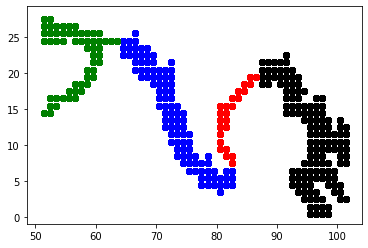

In [8]:
plt.scatter(lon_eBoB,lat_eBoB,color = 'k')
plt.scatter(lon_wBoB,lat_wBoB,color = 'r')
plt.scatter(lon_eAS,lat_eAS,color = 'b')
plt.scatter(lon_wAS,lat_wAS,color = 'g')



# SAVE

In [9]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outfn,mode='w',format = "NETCDF4")

In [10]:
ds_out

<xarray.Dataset>
Dimensions:                (month_eAS: 1200, month_eBoB: 1632, month_wAS: 672, month_wBoB: 288)
Coordinates:
  * month_wAS              (month_wAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_eAS              (month_eAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_wBoB             (month_wBoB) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_eBoB             (month_eBoB) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
Data variables:
    lat_wAS                (month_wAS) float64 14.5 14.5 15.5 ... 26.5 27.5 27.5
    lon_wAS                (month_wAS) float64 51.5 52.5 52.5 ... 56.5 51.5 52.5
    mon_wAS                (month_wAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
    lat_eAS                (month_eAS) float64 4.5 4.5 5.5 5.5 ... 6.5 6.5 6.5
    lon_eAS                (month_eAS) float64 77.5 78.5 77.5 ... 79.5 81.5 82.5
    mon_eAS                (month_eAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
    lat_wBoB               (month_wBoB) float64 10.5 11.5 12.5 ...